# TELECOM CLIENT CHURN EDA AND PREDICTION 

Using Data Science to address Customer Churn

##  OUTLINE
1.Purpose
2.Background
2.Key Questions
4.Decision Cycle
  Key Drivers
  Solution overview
5.Data
6.Analyze
-Business understanding
-Identify data requirements
-Extract data
-Aggregate, Clean and Standarize data
7.Report and Predict
-Busines analysis
-Predicitive model design
-Development and Implementation of Predictive model
8-Engage and Act
-List of churn drivers/KPI for tracking and monitoring
-List of recommended subscribers for targeted churn campaigns
-Monthly churn initiatives

##  PURPOSE

The purpose of this report is to examine the reasons for client churn, to draw conclusions and recommendations to improve client retention and to create a model that will predict churn outcome.  

##  BACKGROUND
The telecom industry is a very competitive one. Mobile/Internet market is saturated and dominated by a few players. This environment leads to intense price wars. Customers have also become smarter and more demanding and loyalty has been swaped by switching every 1/2 years to obtain the best offer on the market. 
Although market share is important and obtaining new customers is paramount, optimizing retention continues to be vital for Telecom operators. To exploit cost efficiencies, installing internet and initial contracting costs should be aimed to be spread over a longer periods than just one year contract´s. It costs up to 5 times as much to acquire a new subscriber as to retain and existing one at the same time that a churned costumer providess 0 revenue and increases competitor market share. 


But, is price the only motive for churning? Good service, time response, accurate invoicing among other factors are also at play at one's decision to switch.

##  KEY QUESTIONS
-How can I understand my churn situation better? Both at macro (organization) and micro (subscriber) levels?
-What are the key drivers of churn and what is influencing them?
-What are the appropiate churn initiatives that should be launched to address the different churn drivers?

##  DECISION CYCLE
                              It´s too complex            INERT SUBSCRIBER

          I haven´t thought   No time/not worth it 
           of churning                                
Customer                      I'm happy in my company     UNCONDITIONALLY LOYAL


          I have though       But I am locked in by my contract     LOCKED 
          of churning 
                              I am not locked in my contract        I decide to stay      CONDITIONAL LOYAL
                                           
                                                                    I decide to leave     I found better offer CONDITIONAL CHU
                                                                                 
                                                                                          my needs have changed 
                                                                                          I am not satisfied  UNSATISFIED CHU
                                                                                          
                                                                                          
##  KEY DRIVERS
CHURN
Cost of service/Competitor pricing
Network Quality
Customer Care Quality
Others

LOYALTY
Offers and services
Price
Quality of products
Quality of customer service
Lenght of contract period
Perception of telecom brand
Marketing

##  SOLUTION OVERVIEW
Developing customer 360
Behavioural segmentation of base
Build churn predictive models
Generate Target lists for campaigns

-Ability to effectively manage customer churn through preventive management using leading and lagging indicators of churn.
-Ability to identify and save customer who are about to churn
-Assess insights on churn behaviour of subscribers; and using the information, to strategize new marketing initiatives
-Identify patterns in customer behaviour of potential churners and initiate pro-active measures to reduce churn
-Capabilities in driving analytics led campaign /marketing initiatives from Predictive Model experience
-Reduction in the campaign spend by targeting fewer subscribers, exhibiting churn behaviour, rather than targeting larger base on gut feel.
-Report revenue loss effected due to churn
-Classification of subscribers as voluntary/involuntary churners
-Cost savings from retention as opposed to re-acquisition

##  DATA DESCRIPTION
The data pertains to client churn information for the year 2020 extracted from the Retention excel answers from the forms filled up by the team. Due to the migration of these responses the data for part of July/August is missing. 
To preserve the identity of the Retention team and data proteccion all personal information regarding the client has been deleted prior to the upload process. 

In [1]:
!pip install numpy
!pip install pandas

## Data Loading

In [4]:
import pandas as pd
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv('TelcoData.csv', delimiter=',')

In [6]:
data

,Billing,Canal,Servicios que tiene el cliente,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
0,1183483393,Call Back,Fast! + Voz,Llamada de fidelizacion proactiva,Propuesta de Promoción,PROMO LEVEL 1,4/01/2020,Inbound - Rechaza Oferta pero no Baja,Ninguno,Exp Cliente. Cl con F+V con promo Bienvenida 2...
1,1182962595,Call Back,Fast!,Llamada de fidelizacion proactiva,Propuesta de Promoción,PROMO LEVEL 1,4/01/2020,Inbound - Rechaza Oferta pero no Baja,Ninguno,Exp Cliente. Ofrecemos F+M9 y M9 por 42.20€/me...
2,1183763323,Call Back,Fast!,Llamada de fidelizacion proactiva,Propuesta de Promoción,No se ofreció Promo de servicios,4/01/2020,Inbound - Rechaza Oferta pero no Baja,Ninguno,Exp Cliente. Contacto con exp cliente el 04/01...
3,1183663689,Call Back,Fast!,Llamada de fidelizacion proactiva,Propuesta de Promoción,PROMO LEVEL 1,4/01/2020,Inbound - Rechaza Oferta pero no Baja,Ninguno,Exp cliente. Ofrecemos F por 29.74€/mes durant...
4,1183437365,Call Back,Fast! + Voz,Llamada de fidelizacion proactiva,Propuesta de Promoción,Downgrade,4/01/2020,Downgrade,Ninguno,Exp Cliente. Callback. Cl con promo bienvenida...
...,...,...,...,...,...,...,...,...,...,...
14127,1182903482,Inbound,Fast!,Llamada de fidelizacion proactiva,Propuesta de Promoción,PROMO LEVEL 1,16/07/2021,RETENIDO PROMO,Ninguno,EC: solicita promo para añadir un móvil. Ofrez...
14128,1183789880,Campaña Emailing,Fast!,Llamada de fidelizacion proactiva,Propuesta de Promoción,OFERTA FIDELIZACION EMAIL,NaN,RETENIDO PROMO,Ninguno,Exp Cliente:Mail Fidelización - Acepta Oferta ...
14129,1183592714,Inbound,Fast! + Voz,Competidor - No Informa,Cliente no quiere escuchar oferta,NaN,16/07/2021,Churn - Competitor - No Informa,Cliente no informa,exp.cliente: Solicita baja del servicio fecha...
14130,1183562220,Inbound,Fast! + Voz + Móvil,Problema técnico,Cliente no quiere escuchar oferta,NaN,18/07/2021,Churn - Incidencia técnica,Cliente no informa,FECHA BAJA 18/07/2021 \nMOTIVO: TÉCNICO- un pa...


In [7]:
data.info(verbose=True ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14132 entries, 0 to 14131
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Billing                                        14131 non-null  object
 1   Canal                                          14124 non-null  object
 2   Servicios que tiene el cliente                 13849 non-null  object
 3   Razón para darse de baja / solicitar oferta    13721 non-null  object
 4   Acción desde equipo de Experiencia de Cliente  13723 non-null  object
 5   Nivel de oferta                                10608 non-null  object
 6   Fecha de cierre de línea                       13874 non-null  object
 7   Resolución                                     13772 non-null  object
 8   Operador receptor                              13289 non-null  object
 9   Notas                                          12966 non-null

## DATA VOLUME AND TYPE

In [8]:
data.shape

(14132, 10)

## CLEANING DE DATA


In [9]:
data.isnull().values.any()

True

In [10]:
data.isna()

,Billing,Canal,Servicios que tiene el cliente,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14127,False,False,False,False,False,False,False,False,False,False
14128,False,False,False,False,False,False,True,False,False,False
14129,False,False,False,False,False,True,False,False,False,False
14130,False,False,False,False,False,True,False,False,False,False


In [11]:
#Columns with NA values:
data.columns[data.isnull().any()]

Index(['Billing', 'Canal', 'Servicios que tiene el cliente',
       'Razón para darse de baja / solicitar oferta',
       'Acción desde equipo de Experiencia de Cliente', 'Nivel de oferta',
       'Fecha de cierre de línea', 'Resolución', 'Operador receptor', 'Notas'],
      dtype='object')

In [12]:
#How many NA values:
data.values.any()

'1183483393'

In [15]:
#We will drop the rows that do not have the reason for wanting to cancel the service, action done, and resolution
clean_data=data.dropna(subset = ['Razón para darse de baja / solicitar oferta', 'Acción desde equipo de Experiencia de Cliente', 'Resolución'])
clean_data.columns[clean_data.isnull().any()]

Index(['Canal', 'Servicios que tiene el cliente', 'Nivel de oferta',
       'Fecha de cierre de línea', 'Operador receptor', 'Notas'],
      dtype='object')

In [72]:
clean_data.shape

(8995, 10)

In [ ]:
#We will be analizing 8995 calls, and we have dropped a large amount of data due to not having values. 

In [73]:
#Let's explore the source of the calls
clean_data.groupby('Canal').count()

,Billing,Servicios que tiene el cliente,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
Canal,,,,,,,,,
Call Back,643,642,643,643,643,638,643,610,637
Campaña Emailing,71,71,71,71,71,15,71,71,70
Email,52,52,52,52,52,52,52,48,52
Fijo Pot-Out (Portanet),1679,1597,1679,1679,1679,1679,1679,1650,1031
Inbound,6515,6508,6515,6515,6515,6434,6515,5999,6423
Inbound - Empresas,10,10,10,10,10,10,10,10,10
Outbound,23,23,23,23,23,23,23,9,23


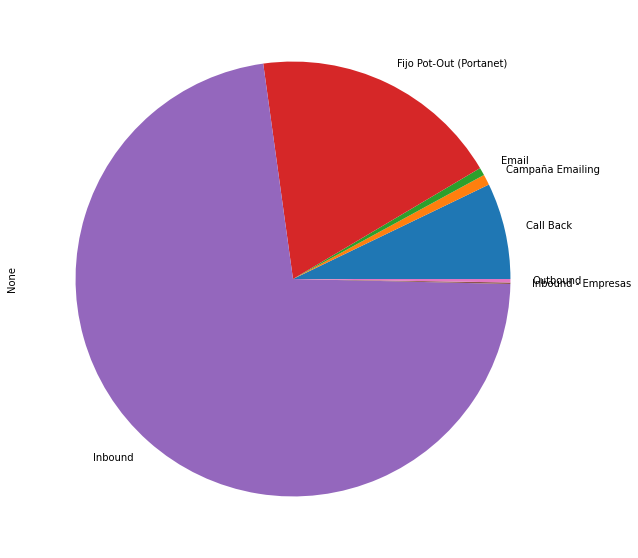

In [80]:
clean_data.groupby(['Canal']).size().plot.pie(figsize=(10,10))
plt.show()


In [81]:
clean_data['Canal'].value_counts(normalize=True)

Inbound                    0.724452
Fijo Pot-Out (Portanet)    0.186701
Call Back                  0.071500
Campaña Emailing           0.007895
Email                      0.005782
Outbound                   0.002558
Inbound - Empresas         0.001112
Name: Canal, dtype: float64

In [ ]:
#72% of the interaction with clients are inbound calls. While 18% are churn entries.

In [82]:
#Let's explore what are the products that client have:
clean_data.groupby('Servicios que tiene el cliente').count()

,Billing,Canal,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
Servicios que tiene el cliente,,,,,,,,,
Esencial,222,222,222,222,222,221,222,209,218
Esencial + Móvil,93,93,93,93,93,90,93,90,93
Esencial + Voz,126,126,126,126,126,125,126,114,108
Esencial + Voz + Móvil,130,130,130,130,130,128,130,120,124
Fast!,2591,2591,2591,2591,2591,2500,2591,2379,2547
Fast! + Móvil,1244,1244,1244,1244,1244,1234,1244,1148,1232
Fast! + Voz,2118,2118,2118,2118,2118,2100,2118,1995,1805
Fast! + Voz + Móvil,2305,2305,2305,2305,2305,2290,2305,2183,2011
Negocio (Fast+Voz),58,58,58,58,58,57,58,57,49


In [83]:
clean_data['Servicios que tiene el cliente'].value_counts(normalize=True)

Fast!                        0.291025
Fast! + Voz + Móvil          0.258901
Fast! + Voz                  0.237897
Fast! + Móvil                0.139728
Esencial                     0.024935
Esencial + Voz + Móvil       0.014602
Esencial + Voz               0.014153
Esencial + Móvil             0.010446
Negocio (Fast+Voz)           0.006515
SuperFast!                   0.001348
SuperFast! + Voz + Móvil     0.000225
SuperFast! + Móvil           0.000112
SuperFast! + Voz             0.000112
Name: Servicios que tiene el cliente, dtype: float64

In [ ]:
#A large percentage of clients only have internet. There is an opportunity to grow with cross-selling mobile lines 
# and perhaps launching a 'Add your line' campaign. The service provider is known for taking internet to remote areas where 
#Mobile connectivity is very low and where only one operator has good mobile coverage.

In [16]:
#Let's explore the reasons for contacting...
clean_data.groupby('Razón para darse de baja / solicitar oferta').count()

,Billing,Canal,Servicios que tiene el cliente,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
Razón para darse de baja / solicitar oferta,,,,,,,,,
CANCELADO,1,1,1,1,1,1,1,1,1
Competidor - No Informa,349,349,347,349,186,347,349,340,336
Competidor - Precio,1332,1332,1317,1332,974,1324,1332,1248,1271
Competidor - Prestaciones,300,300,297,300,183,297,300,277,290
Desconocimiento de motivo,538,537,519,538,369,538,538,526,423
Desconocimiento de motivoi,1,1,1,1,1,1,1,1,1
Desuso,262,262,262,262,181,261,262,235,258
Económico,1867,1867,1866,1867,1777,1854,1867,1698,1843
Ilocalizable,878,877,844,878,634,878,878,867,438


In [24]:
#We will drop single rows that contain a spelling error at the reason for calling thus creating an extra unnecesary group:

clean_data= clean_data[clean_data['Razón para darse de baja / solicitar oferta'].str.contains
                        ('CANCELADO|TAREA|LLamada de fidelizacion proactiva|Desconocimiento de motivoi') == False]

In [25]:
clean_data.groupby('Razón para darse de baja / solicitar oferta').count()

,Billing,Canal,Servicios que tiene el cliente,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Resolución,Operador receptor,Notas
Razón para darse de baja / solicitar oferta,,,,,,,,,
Competidor - No Informa,349,349,347,349,186,347,349,340,336
Competidor - Precio,1332,1332,1317,1332,974,1324,1332,1248,1271
Competidor - Prestaciones,300,300,297,300,183,297,300,277,290
Desconocimiento de motivo,538,537,519,538,369,538,538,526,423
Desuso,262,262,262,262,181,261,262,235,258
Económico,1867,1867,1866,1867,1777,1854,1867,1698,1843
Ilocalizable,878,877,844,878,634,878,878,867,438
Incidencia comercial,359,359,359,359,128,356,359,353,354
Llamada de fidelizacion proactiva,4719,4719,4715,4719,4593,4603,4719,4536,4663


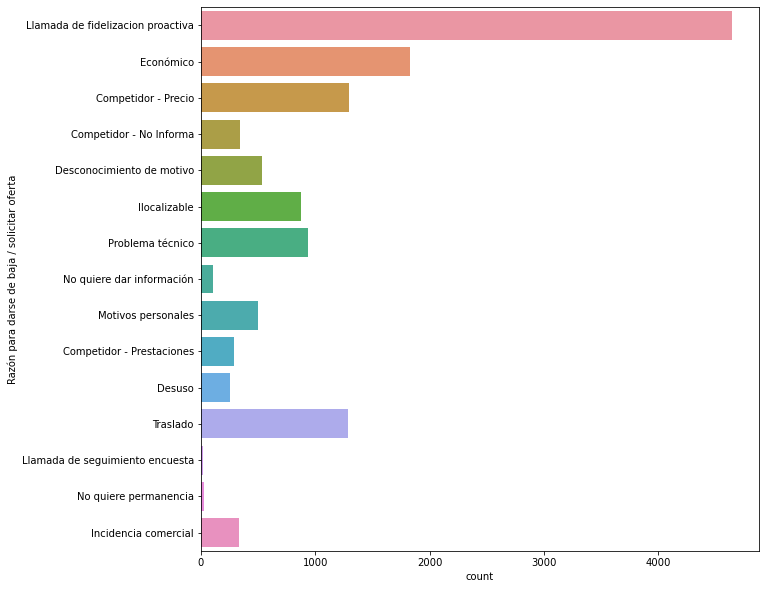

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (10,10) )

sns.countplot(data=clean_data, y='Razón para darse de baja / solicitar oferta')
plt.show()

In [33]:
clean_data['Razón para darse de baja / solicitar oferta'].value_counts(normalize=True)

Llamada de fidelizacion proactiva    0.347113
Económico                            0.137330
Competidor - Precio                  0.097977
Traslado                             0.097021
Problema técnico                     0.073336
Ilocalizable                         0.064583
Desconocimiento de motivo            0.039573
Motivos personales                   0.038838
Incidencia comercial                 0.026407
Competidor - No Informa              0.025671
Competidor - Prestaciones            0.022067
Desuso                               0.019272
No quiere dar información            0.007723
No quiere permanencia                0.001839
Llamada de seguimiento encuesta      0.001250
Name: Razón para darse de baja / solicitar oferta, dtype: float64

In [ ]:
#We can clearly depict the motives of the calls being and active call after receiving an email/sms offer or wanting
#to improve their existing contract the first one and economic reasons 21% of the remaining calls. 
#Tecnical problems only accounting for 0.07% and 0.02% for administrative issues.

In [34]:
#Let´s explore the resolution for the calls
clean_data.groupby('Resolución').count()

,Billing,Canal,Servicios que tiene el cliente,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Operador receptor,Notas
Resolución,,,,,,,,,
Baja,1,1,1,1,1,1,1,0,1
Baja,1,1,1,1,1,1,1,0,0
Baja Parcial - Móvil,10,10,10,10,10,3,10,10,10
Churn - Baja y Alta en este o nuevo dom. para conseguir promo de captación,39,39,39,39,39,8,39,38,38
Churn - Cliente con deuda por no gestión de baja,2,2,2,2,2,0,2,2,2
Churn - Competidor - Penalización otro Operador,41,41,41,41,41,29,41,40,38
Churn - Competidor Mejor Cobertura móvil,11,11,11,11,11,7,11,11,11
Churn - Competidor Mejor Precio,874,874,863,874,874,545,872,836,820
Churn - Competidor Mejor Precio Datos Móviles,22,22,22,22,22,14,22,22,22


In [38]:
#Equally we will drop single rows that contain a spelling error at the reason for calling thus creating an extra unnecesary group:

clean_data= clean_data[clean_data['Resolución'].str.contains
('Recogida de equipos|enviamos email|escalado TECH|escalado caso a la espera de resolucion|otro operador|pendiente de resolucion|pendiente recogida de equipos|retenido') == False]

In [39]:
clean_data.groupby('Resolución').count()

,Billing,Canal,Servicios que tiene el cliente,Razón para darse de baja / solicitar oferta,Acción desde equipo de Experiencia de Cliente,Nivel de oferta,Fecha de cierre de línea,Operador receptor,Notas
Resolución,,,,,,,,,
Churn - Cliente con deuda por no gestión de baja,2,2,2,2,2,0,2,2,2
Churn - Competidor - Penalización otro Operador,41,41,41,41,41,29,41,40,38
Churn - Competidor Mejor Cobertura móvil,11,11,11,11,11,7,11,11,11
Churn - Competidor Mejor Precio,874,874,863,874,874,545,872,836,820
Churn - Competidor Mejor Precio Datos Móviles,22,22,22,22,22,14,22,22,22
Churn - Competidor Mejor Precio Internet,79,79,79,79,79,43,79,71,77
Churn - Competidor Prestaciones,190,190,182,190,190,136,190,175,182
Churn - Competidor Prestaciones Cobertura Móvil,25,25,25,25,25,16,25,24,23
Churn - Competidor Prestaciones Datos Móvil,29,29,29,29,29,17,29,26,28


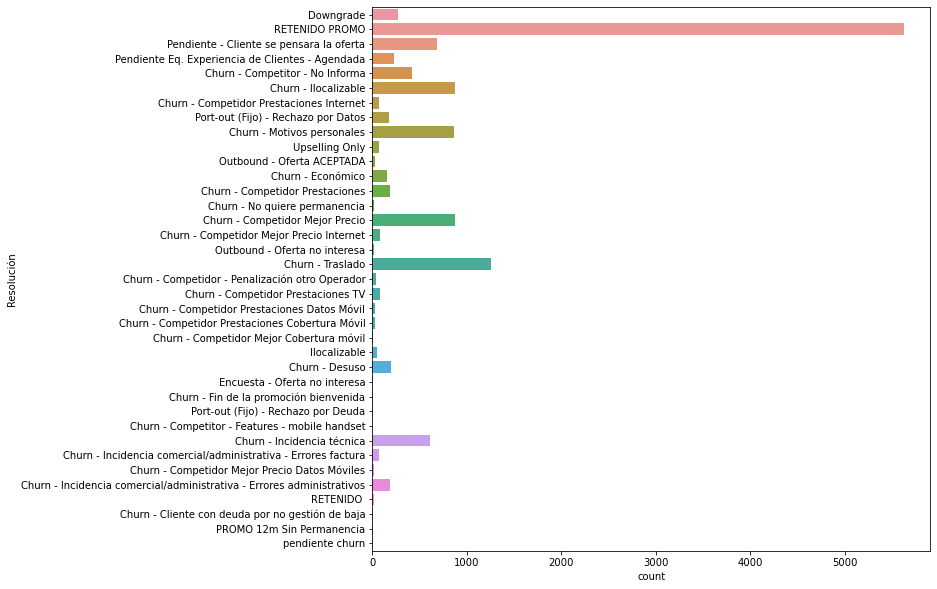

In [42]:
plt.figure(figsize= (10,10) )

sns.countplot(data=clean_data, y='Resolución')
plt.show()

In [44]:
clean_data['Resolución'].value_counts(normalize=True)

RETENIDO PROMO                                                           0.423822
Churn - Traslado                                                         0.094761
Churn - Ilocalizable                                                     0.066189
Churn - Competidor Mejor Precio                                          0.065888
Churn - Motivos personales                                               0.065285
Pendiente - Cliente se pensara la oferta                                 0.051715
Churn - Incidencia técnica                                               0.046287
Churn - Competitor - No Informa                                          0.031436
Downgrade                                                                0.020128
Pendiente Eq. Experiencia de Clientes - Agendada                         0.017490
Churn - Desuso                                                           0.015077
Churn - Incidencia comercial/administrativa - Errores administrativos    0.014399
Churn - Competid

In [ ]:
#We can clearly see that retention given an offer is of 42% while being the top churning a moving from the client at 0.09% 
#0.06 for competitor price.

In [65]:
clean_data['Nivel de oferta'].value_counts(normalize=True)

No se ofreció Promo de servicios           0.339855
PROMO LEVEL 1                              0.288271
PROMO 12m Sin Permanencia                  0.103168
PROMO LEVEL 3                              0.092607
OFERTA ADQUISICION                         0.047693
                                             ...   
No propuesta promo retención por perma.    0.000111
PROMO 12m Con Permanencia                  0.000111
Aun tiene promoción                        0.000111
Ilocalizable                               0.000111
PROMO SIN LEVEL                            0.000111
Name: Nivel de oferta, Length: 62, dtype: float64

In [ ]:
#Let's look at the churning options of the client which company they tend to switch to?

In [85]:
pd.set_option('display.max_rows', 62)
clean_data['Operador receptor'].value_counts(normalize=True)

Ninguno               0.622931
Cliente no informa    0.091916
Movistar              0.051554
Masmóvil              0.039290
Euskaltel             0.032028
                        ...   
JAZZTEL               0.000119
NETCAN                0.000119
GURBTEC AIRE          0.000119
XTRA                  0.000119
NIN                   0.000119
Name: Operador receptor, Length: 74, dtype: float64

In [93]:
operadores= clean_data[clean_data['Operador receptor'].str.contains
('Ninguno|Cliente no informa') == False]
operadores.rename(columns = {'Operador receptor':'operador'}, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


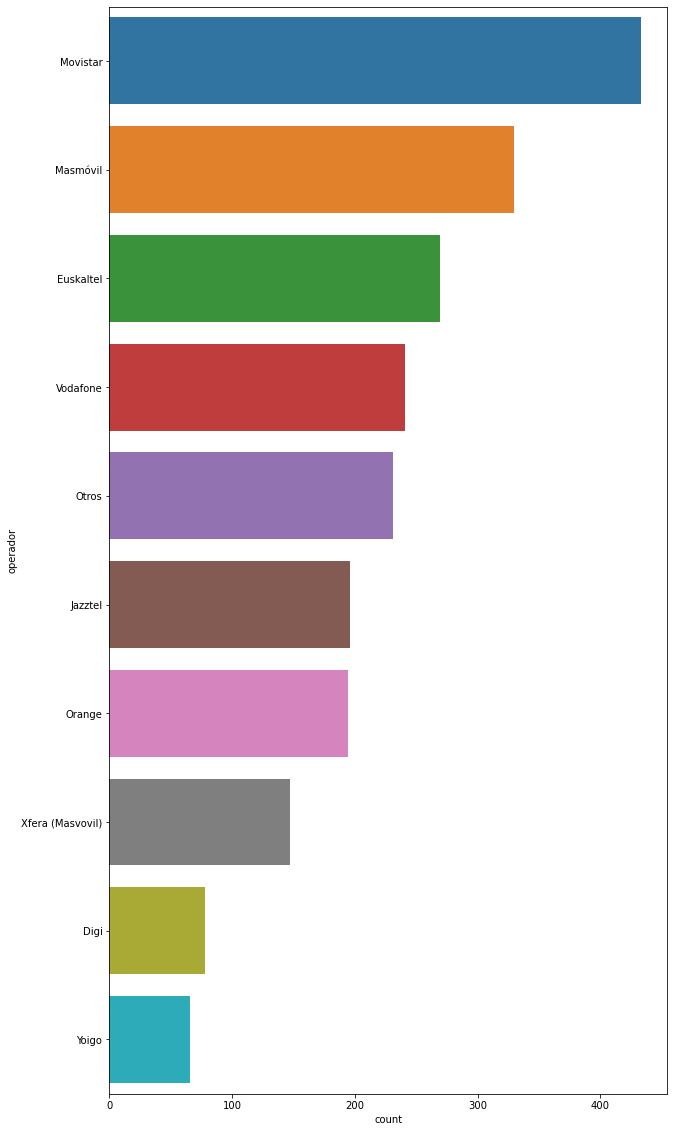

In [95]:
plt.figure(figsize= (10,20) )

sns.countplot(data=operadores, y='operador', order=operadores.operador.value_counts().iloc[:10].index)
plt.show()

In [96]:
clean_data.corr()

""


In [123]:
##RECOMENDATIONS